<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

`Basic Classification Trees`

When fitting trees and rule-based models, the practitioner must `make a choice` regarding the treatment of categorical predictor data:
1. Each categorical predictor can be entered into the model as a single entity so that the model decides how to group or split the values. In the text, this  will be referred to as using grouped categories.
2. Categorical predictors are first decomposed into binary dummy variables. In this way, the resulting dummy variables are considered independently, forcing binary splits for the categories. In effect, splitting on a binary dummy variable prior to modeling imposes a “one-versus-all” split of the categories. This approach will be labelled as using independent categories.



In [5]:
rm(list=ls())

In [126]:
# Sys.setlocale("LC_TIME", "English")
# library(parallel)
# setDefaultCluster(makeCluster(4))
# source("CreateGrantData_modified - copy.R")
# colnames(training)[1540:1542] <- c("SponsorCode", "ContractValueBand", "GrantCategoryCode")
# colnames(testing)[1540:1542] <- c("SponsorCode", "ContractValueBand", "GrantCategoryCode")
# fullSet[1540:1542] <- c("SponsorCode", "ContractValueBand", "GrantCategoryCode")
# save(training,testing,pre2008,fullSet,file = "grant_Data_chp14.Rdata")

[1] "English_United States.1252"

In [9]:
load("grant_Data_chp14use.Rdata")

In [141]:
fit_dummy <- dummyVars(~., data = training[,c(1:1545)], levelsOnly = TRUE)
training_factor <- as.data.frame(predict(fit_dummy, training[,c(1:1545)]))
trn <- cbind(training_factor,training$Class)
colnames(trn)[1889] <- c("Class")

In [144]:
fullSet <- names(training)[names(training) != "Class"]
factorPredictors <- names(trn)[names(trn) != "Class"]

&#X1F6A9;
```r
library(caret)
ctrl <- trainControl(
                     method="LGOCV",
                    summaryFunction=twoClassSummary,
                    classProbs=T,
                    index=list(TrainSet=pre2008),
                    savePredictions=T)
```

In [150]:
library(caret)
ctrl <- trainControl(
                     method="LGOCV",
                    summaryFunction=twoClassSummary,
                    classProbs=T,
                    index=list(TrainSet=pre2008),
                    savePredictions=T)
set.seed(476)
fit_cart <- train(
                     x=training[,fullSet],
                     y=training$Class,
                    method="rpart",
                    tuneLength=30,
                    metric="ROC",
                    trControl=ctrl)
fit_cart

CART 

8190 samples
1545 predictors
   2 classes: 'successful', 'unsuccessful' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (1 reps, 75%) 
Summary of sample sizes: 6633 
Resampling results across tuning parameters:

  cp            ROC        Sens       Spec     
  0.0001753002  0.9009350  0.7350877  0.8703141
  0.0002103602  0.9009350  0.7350877  0.8703141
  0.0002629503  0.9009350  0.7350877  0.8703141
  0.0003681304  0.8911881  0.7614035  0.8642351
  0.0003756433  0.8911881  0.7614035  0.8642351
  0.0003944255  0.8911881  0.7614035  0.8642351
  0.0005259006  0.8914271  0.7754386  0.8652482
  0.0006573758  0.8947351  0.7947368  0.8662614
  0.0007888509  0.8985718  0.8210526  0.8642351
  0.0008765010  0.8985718  0.8210526  0.8642351
  0.0009203261  0.8985718  0.8210526  0.8642351
  0.0010518012  0.8967534  0.8245614  0.8561297
  0.0011832764  0.8976368  0.8245614  0.8530902
  0.0013147515  0.8942996  0.8368421  0.8470111
  0.0014462267  0.8942996  0.8368421  0.

In [24]:
# library(partykit)
# plot(as.party(fit_cart$finalModel))

In [151]:
cm_cart <- confusionMatrix(fit_cart,norm="none")
cm_cart

Repeated Train/Test Splits Estimated (1 reps, 75%) Confusion Matrix 

(entries are un-normalized aggregated counts)
 
Confusion Matrix and Statistics

              Reference
Prediction     successful unsuccessful
  successful          463          126
  unsuccessful        107          861
                                          
               Accuracy : 0.8504          
                 95% CI : (0.8317, 0.8677)
    No Information Rate : 0.6339          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6798          
 Mcnemar's Test P-Value : 0.2383          
                                          
            Sensitivity : 0.8123          
            Specificity : 0.8723          
         Pos Pred Value : 0.7861          
         Neg Pred Value : 0.8895          
             Prevalence : 0.3661          
         Detection Rate : 0.2974          
   Detection Prevalence : 0.3783          
      Balanced Accur

In [152]:
library(pROC)
roc_cart <- roc(
                response=fit_cart$pred$obs,
                predictor=fit_cart$pred$successful,
                levels=rev(levels(fit_cart$pred$obs)))
roc_cart


Call:
roc.default(response = fit_cart$pred$obs, predictor = fit_cart$pred$successful,     levels = rev(levels(fit_cart$pred$obs)))

Data: fit_cart$pred$successful in 29610 controls (fit_cart$pred$obs unsuccessful) < 17100 cases (fit_cart$pred$obs successful).
Area under the curve: 0.8856

---

In [153]:
set.seed(476)
fit_cart_factor <- train(,
                         x=trn[,factorPredictors],
                         y=trn$Class,
                        method="rpart",
                        tuneLength=30,
                        metric="ROC",
                        trControl=ctrl)
fit_cart_factor

CART 

8190 samples
1888 predictors
   2 classes: 'successful', 'unsuccessful' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (1 reps, 75%) 
Summary of sample sizes: 6633 
Resampling results across tuning parameters:

  cp            ROC        Sens       Spec     
  0.0003506004  0.8945191  0.7789474  0.8368794
  0.0003944255  0.8945191  0.7789474  0.8368794
  0.0005259006  0.8960549  0.8035088  0.8409321
  0.0006573758  0.8974600  0.8228070  0.8297872
  0.0007888509  0.8972591  0.7929825  0.8389058
  0.0008765010  0.8965641  0.8771930  0.8176292
  0.0008940310  0.8965641  0.8771930  0.8176292
  0.0009203261  0.8965641  0.8771930  0.8176292
  0.0010518012  0.8980990  0.8807018  0.8064843
  0.0013147515  0.9063616  0.8824561  0.8156028
  0.0014462267  0.9103441  0.8438596  0.8480243
  0.0015777018  0.9106721  0.8473684  0.8459980
  0.0021036024  0.9116461  0.8105263  0.8622087
  0.0022350776  0.9116461  0.8105263  0.8622087
  0.0023665527  0.9116461  0.8105263  0.

In [154]:
cm_cart_factor <- confusionMatrix(fit_cart_factor,norm="none")
cm_cart_factor

Repeated Train/Test Splits Estimated (1 reps, 75%) Confusion Matrix 

(entries are un-normalized aggregated counts)
 
Confusion Matrix and Statistics

              Reference
Prediction     successful unsuccessful
  successful          456          133
  unsuccessful        114          854
                                          
               Accuracy : 0.8414          
                 95% CI : (0.8223, 0.8592)
    No Information Rate : 0.6339          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6606          
 Mcnemar's Test P-Value : 0.2521          
                                          
            Sensitivity : 0.8000          
            Specificity : 0.8652          
         Pos Pred Value : 0.7742          
         Neg Pred Value : 0.8822          
             Prevalence : 0.3661          
         Detection Rate : 0.2929          
   Detection Prevalence : 0.3783          
      Balanced Accur

In [155]:
roc_cart_factor <- roc(response = fit_cart_factor$pred$obs,
                      predictor=fit_cart_factor$pred$successful,
                      levels-rev(levels(fit_cart_factor$pred$obs)))
roc_cart_factor


Call:
roc.default(response = fit_cart_factor$pred$obs, predictor = fit_cart_factor$pred$successful,     controls = levels - rev(levels(fit_cart_factor$pred$obs)))

Data: fit_cart_factor$pred$successful in 17100 controls (fit_cart_factor$pred$obs successful) > 29610 cases (fit_cart_factor$pred$obs unsuccessful).
Area under the curve: 0.8915

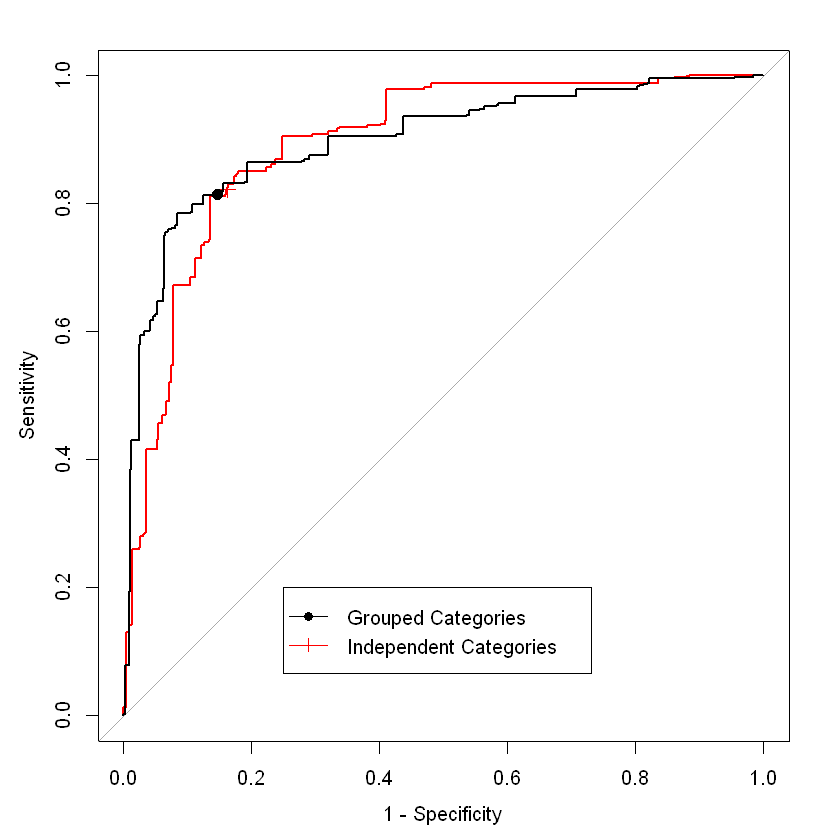

In [156]:
plot(roc_cart, type = "s", print.thres = c(.5),
     print.thres.pch = 3,
     print.thres.pattern = "",
     print.thres.cex = 1.2,
     col = "red", legacy.axes = TRUE,
     print.thres.col = "red")
plot(roc_cart_factor,
     type = "s",
     add = TRUE,
     print.thres = c(.5),
     print.thres.pch = 16, legacy.axes = TRUE,
     print.thres.pattern = "",
     print.thres.cex = 1.2)
legend(.75, .2,
       c("Grouped Categories", "Independent Categories"),
       lwd = c(1, 1),
       col = c("black", "red"),
       pch = c(16, 3))

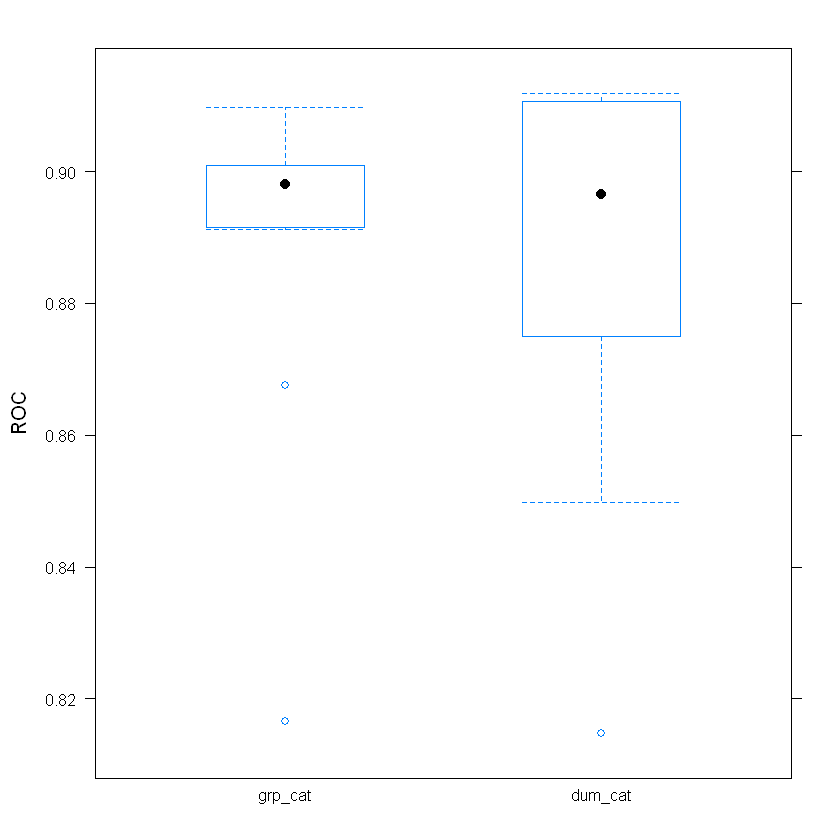

In [184]:
plt_data <- rbind(data.frame(fit_cart$results[,1:2],approach=rep("grp_cat",times=nrow(fit_cart$results))),
                  data.frame(fit_cart_factor$results[,1:2],approach=rep("dum_cat",times=nrow(fit_cart_factor$results))))
bwplot(ROC~approach,data=plt_data)

---

In [186]:
set.seed(476)
j48Fit <- train(x = training[,fullSet], 
                y = training$Class,
                method = "J48",
                metric = "ROC",
                trControl = ctrl)

# j482008 <- merge(j48Fit$pred,  j48Fit$bestTune)
j48CM <- confusionMatrix(j48Fit, norm = "none")
j48CM

j48Roc <- roc(response = j48Fit$pred$obs,
              predictor = j48Fit$pred$successful,
              levels = rev(levels(j48Fit$pred$obs)))

Repeated Train/Test Splits Estimated (1 reps, 75%) Confusion Matrix 

(entries are un-normalized aggregated counts)
 
Confusion Matrix and Statistics

              Reference
Prediction     successful unsuccessful
  successful          504          204
  unsuccessful         66          783
                                          
               Accuracy : 0.8266          
                 95% CI : (0.8069, 0.8451)
    No Information Rate : 0.6339          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6446          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8842          
            Specificity : 0.7933          
         Pos Pred Value : 0.7119          
         Neg Pred Value : 0.9223          
             Prevalence : 0.3661          
         Detection Rate : 0.3237          
   Detection Prevalence : 0.4547          
      Balanced Accur

In [187]:
set.seed(476)
j48FactorFit <- train(x = trn[,factorPredictors], 
                      y = trn$Class,
                      method = "J48",
                      metric = "ROC",
                      trControl = ctrl)
j48FactorFit

# j48Factor2008 <- merge(j48FactorFit$pred,  j48FactorFit$bestTune)
j48FactorCM <- confusionMatrix(j48FactorFit, norm = "none")
j48FactorCM

j48FactorRoc <- roc(response = j48FactorFit$pred$obs,
                    predictor = j48FactorFit$pred$successful,
                    levels = rev(levels(j48FactorFit$pred$obs)))

C4.5-like Trees 

8190 samples
1888 predictors
   2 classes: 'successful', 'unsuccessful' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (1 reps, 75%) 
Summary of sample sizes: 6633 
Resampling results across tuning parameters:

  C      M  ROC        Sens       Spec     
  0.010  1  0.8368021  0.8140351  0.8490375
  0.010  2  0.8714455  0.8122807  0.8470111
  0.010  3  0.8703985  0.7736842  0.8480243
  0.255  1  0.7522130  0.7649123  0.8510638
  0.255  2  0.8336177  0.7596491  0.8368794
  0.255  3  0.8544375  0.7859649  0.8378926
  0.500  1  0.7443849  0.7403509  0.8520770
  0.500  2  0.8059102  0.7350877  0.8480243
  0.500  3  0.8116452  0.7245614  0.8662614

ROC was used to select the optimal model using the largest value.
The final values used for the model were C = 0.01 and M = 2.

Repeated Train/Test Splits Estimated (1 reps, 75%) Confusion Matrix 

(entries are un-normalized aggregated counts)
 
Confusion Matrix and Statistics

              Reference
Prediction     successful unsuccessful
  successful          463          151
  unsuccessful        107          836
                                          
               Accuracy : 0.8343          
                 95% CI : (0.8149, 0.8524)
    No Information Rate : 0.6339          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6487          
 Mcnemar's Test P-Value : 0.007427        
                                          
            Sensitivity : 0.8123          
            Specificity : 0.8470          
         Pos Pred Value : 0.7541          
         Neg Pred Value : 0.8865          
             Prevalence : 0.3661          
         Detection Rate : 0.2974          
   Detection Prevalence : 0.3943          
      Balanced Accur

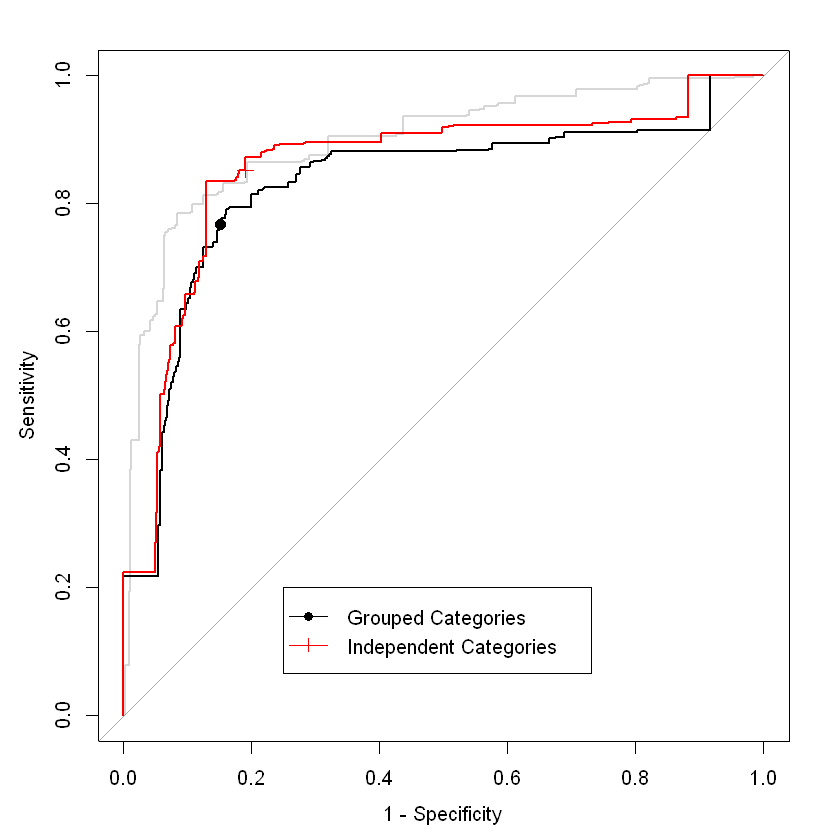

In [189]:
plot(j48FactorRoc, type = "s", print.thres = c(.5), 
     print.thres.pch = 16, print.thres.pattern = "", 
     print.thres.cex = 1.2, legacy.axes = TRUE)
plot(j48Roc, type = "s", print.thres = c(.5), 
     print.thres.pch = 3, print.thres.pattern = "", 
     print.thres.cex = 1.2, legacy.axes = TRUE,
     add = TRUE, col = "red", print.thres.col = "red")
legend(.75, .2,
       c("Grouped Categories", "Independent Categories"),
       lwd = c(1, 1),
       col = c("black", "red"),
       pch = c(16, 3))

plot(roc_cart_factor, type = "s", add = TRUE, 
     col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)


`Rule-Based Models`

In [2]:
# library(doMC)
# registerDoMC()
# "Models using RWeka will not work with parallel processing with multicore/doMC"
library(parallel)
makeCluster(detectCores())

socket cluster with 4 nodes on host 'localhost'

In [4]:
load("grant_Data_chp14use.Rdata")

In [5]:
library(caret)
ctrl <- trainControl(
                     method="LGOCV",
                    summaryFunction=twoClassSummary,
                    classProbs=T,
                    index=list(TrainSet=pre2008),
                    savePredictions=T)

Loading required package: lattice
Loading required package: ggplot2


In [6]:
set.seed(476)
fit_ruleTree <- train(
                      x=training[,fullSet],
                      y=training$Class,
                     method="PART",
                     metric="ROC",
                     trControl=ctrl)
fit_ruleTree

Rule-Based Classifier 

8190 samples
1545 predictors
   2 classes: 'successful', 'unsuccessful' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (1 reps, 75%) 
Summary of sample sizes: 6633 
Resampling results across tuning parameters:

  threshold  pruned  ROC        Sens       Spec     
  0.010      yes     0.8296566  0.7649123  0.8034448
  0.010      no      0.7956860  0.7578947  0.8206687
  0.255      yes     0.8347296  0.8070175  0.7659574
  0.255      no      0.7956860  0.7578947  0.8206687
  0.500      yes     0.8349340  0.7350877  0.8399189
  0.500      no      0.7956860  0.7578947  0.8206687

ROC was used to select the optimal model using the largest value.
The final values used for the model were threshold = 0.5 and pruned = yes.

In [7]:
cm_ruleTree <- confusionMatrix(fit_ruleTree,norm="none")
cm_ruleTree

Repeated Train/Test Splits Estimated (1 reps, 75%) Confusion Matrix 

(entries are un-normalized aggregated counts)
 
Confusion Matrix and Statistics

              Reference
Prediction     successful unsuccessful
  successful          419          158
  unsuccessful        151          829
                                          
               Accuracy : 0.8015          
                 95% CI : (0.7808, 0.8211)
    No Information Rate : 0.6339          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5735          
 Mcnemar's Test P-Value : 0.7329          
                                          
            Sensitivity : 0.7351          
            Specificity : 0.8399          
         Pos Pred Value : 0.7262          
         Neg Pred Value : 0.8459          
             Prevalence : 0.3661          
         Detection Rate : 0.2691          
   Detection Prevalence : 0.3706          
      Balanced Accur

In [8]:
library(pROC)
roc_ruleTree <- roc(response=fit_ruleTree$pred$obs,
                   predictor=fit_ruleTree$pred$successful,
                   levels=rev(levels(fit_ruleTree$pred$obs)))
roc_ruleTree

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var




Call:
roc.default(response = fit_ruleTree$pred$obs, predictor = fit_ruleTree$pred$successful,     levels = rev(levels(fit_ruleTree$pred$obs)))

Data: fit_ruleTree$pred$successful in 5922 controls (fit_ruleTree$pred$obs unsuccessful) < 3420 cases (fit_ruleTree$pred$obs successful).
Area under the curve: 0.8061

In [9]:
#independent factors
set.seed(476)
fit_ruleTree_dum <- train(trn[,factorPredictors],trn$Class,
                         method="PART",
                         metric="ROC",
                         trControl=ctrl)
fit_ruleTree_dum

Rule-Based Classifier 

8190 samples
1888 predictors
   2 classes: 'successful', 'unsuccessful' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (1 reps, 75%) 
Summary of sample sizes: 6633 
Resampling results across tuning parameters:

  threshold  pruned  ROC        Sens       Spec     
  0.010      yes     0.8159912  0.7526316  0.8277609
  0.010      no      0.7893439  0.7684211  0.8095238
  0.255      yes     0.7949546  0.7421053  0.8135765
  0.255      no      0.7893439  0.7684211  0.8095238
  0.500      yes     0.7974671  0.7508772  0.8034448
  0.500      no      0.7893439  0.7684211  0.8095238

ROC was used to select the optimal model using the largest value.
The final values used for the model were threshold = 0.01 and pruned = yes.

In [10]:
roc_ruleTree_dum <- roc(response=fit_ruleTree_dum$pred$obs,
                       predictor = fit_ruleTree_dum$pred$successful,
                       levels=rev(levels(fit_ruleTree_dum$pred$obs)))
roc_ruleTree_dum


Call:
roc.default(response = fit_ruleTree_dum$pred$obs, predictor = fit_ruleTree_dum$pred$successful,     levels = rev(levels(fit_ruleTree_dum$pred$obs)))

Data: fit_ruleTree_dum$pred$successful in 5922 controls (fit_ruleTree_dum$pred$obs unsuccessful) < 3420 cases (fit_ruleTree_dum$pred$obs successful).
Area under the curve: 0.7876

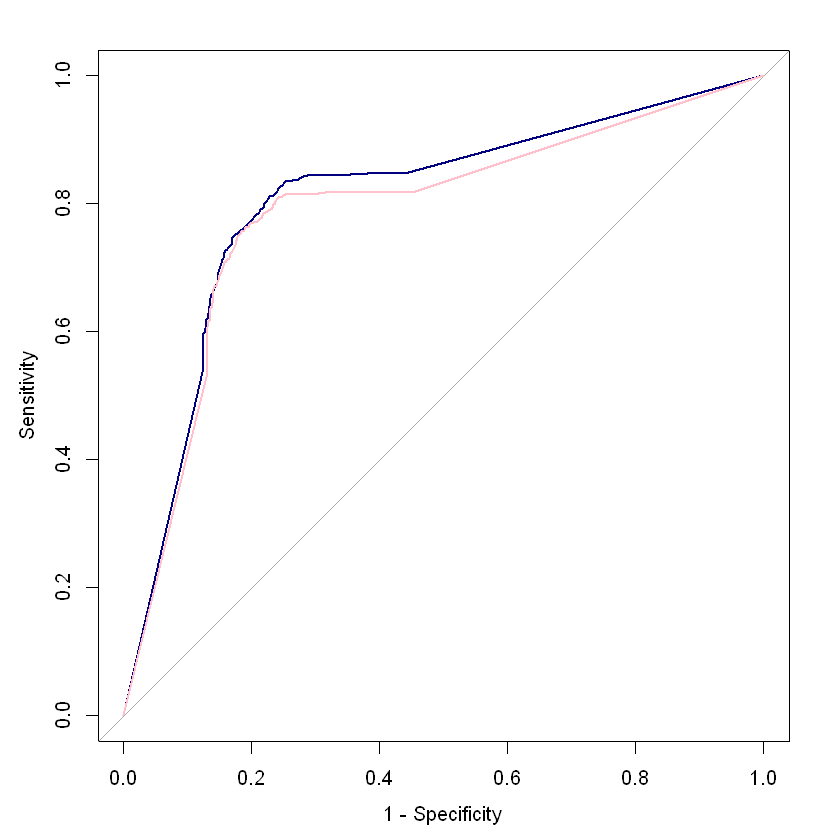

In [11]:
plot(roc_ruleTree,legacy.axes=T,col="navy")
plot.roc(roc_ruleTree_dum,add=T,col="pink")

`Bagged Trees`

In [12]:
set.seed(476)
fit_bagTree <- train(x=training[,fullSet],
                    y=training$Class,
                    method="treebag",nbagg=50,
                    metric="ROC",trControl=ctrl)
fit_bagTree

Bagged CART 

8190 samples
1545 predictors
   2 classes: 'successful', 'unsuccessful' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (1 reps, 75%) 
Summary of sample sizes: 6633 
Resampling results:

  ROC        Sens       Spec    
  0.9169626  0.8280702  0.858156


In [15]:
roc_bagTree <- roc(response = fit_bagTree$pred$obs,
                  predictor = fit_bagTree$pred$successful,
                  levels=rev(levels(fit_bagTree$pred$obs)))

In [20]:
set.seed(476)
fit_bagTree_dum <- train(x=trn_flt[,c(1:70)],y=trn$Class,
                        method="treebag",nbagg=50,
                        metric="ROC",trControl=ctrl)
fit_bagTree_dum

Bagged CART 

8190 samples
  70 predictor
   2 classes: 'successful', 'unsuccessful' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (1 reps, 75%) 
Summary of sample sizes: 6633 
Resampling results:

  ROC        Sens       Spec     
  0.9152776  0.7947368  0.8622087


In [22]:
library(pROC)
roc_bagTree_dum <- roc(response=fit_bagTree_dum$pred$obs,
                      predictor=fit_bagTree_dum$pred$successful,
                      levels=rev(levels(fit_bagTree_dum$pred$obs)))

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



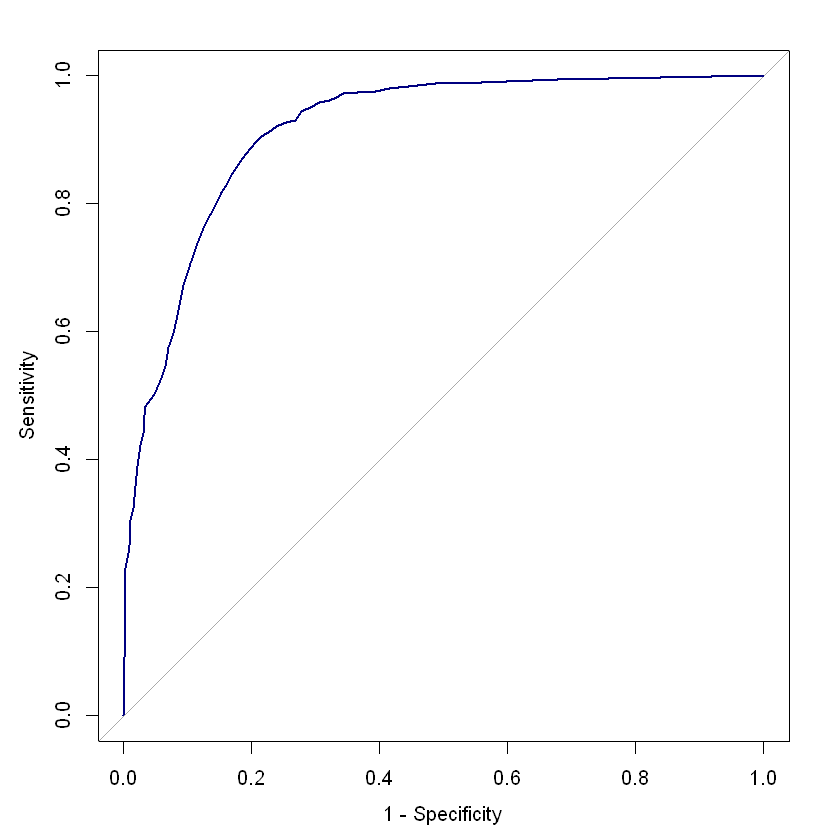

In [24]:
# plot(roc_bagTree,legacy.axes=T,col="navy")
# plot(roc_bagTree_dum,add=T,col="pink")
plot(roc_bagTree_dum,legacy.axes=T,col="navy")

`Random Forest`

`grouped categories`

&#x274C;Can not handle categorical predictors with more than 53 categories.

In [12]:
fullSet_rf <- fullSet[fullSet!=c("SponsorCode","ContractValueBand","GrantCategoryCode")]

In [ ]:
set.seed(476)
fit_rf <- train(x=training[,fullSet_rf],y=training$Class,
               method="rf",ntree=500,tuneGrid=data.frame(mtry=c(5, 10, 20, 32, 50, 100, 250, 500, 1000)),
               importance=T,metric="ROC",trControl=ctrl)
fit_rf

`independent categories`

In [ ]:
fit_rf_dum <- train(x=trn[,factorPredictors],y=trn$Class,
                   method="rf",ntree=1500,
                   tuneGrid=data.frame(mtry=c(5, 10, 20, 32, 50, 100, 250, 500, 1000)),
                   importance=T,metric="ROC",trControl=ctrl)
fit_rf_dum

> as these two modles didn't use the same "training set", I will skep the comparison.

`Boosting`

In [1]:
load("grant_Data_chp14use.Rdata")
library(caret)
ctrl <- trainControl(
                     method="LGOCV",
                    summaryFunction=twoClassSummary,
                    classProbs=T,
                    index=list(TrainSet=pre2008),
                    savePredictions=T)

Loading required package: lattice
Loading required package: ggplot2


&#x274C;variable 114: CI.Dept1253 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli.

In [ ]:
grid_gbm <- expand.grid(interaction.depth = c(1, 3, 5, 7, 9),
                       n.trees = (1:20)*100,
                       shrinkage = c(.01, .1),
                       n.minobsinnode=c(10,20))

set.seed(476)
fit_gbm <- train(x = training[,fullSet], 
                y = training$Class,
                method = "gbm",
                tuneGrid = grid_gbm,
                metric = "ROC",
                verbose = FALSE,
                trControl = ctrl)
gbmFit

`C5.0`

In [ ]:
c50Grid <- expand.grid(trials = c(1:9, (1:10)*10),
                       model = c("tree", "rules"),
                       winnow = c(TRUE, FALSE))
set.seed(476)
c50FactorFit <- train(training[,factorPredictors], training$Class,
                      method = "C5.0",
                      tuneGrid = c50Grid,
                      verbose = FALSE,
                      metric = "ROC",
                      trControl = ctrl)
c50FactorFit

&#x1F3B0;  **Some Notes**

In [5]:
library(rpart)
library(rpart.plot)

In [3]:
data(kyphosis)
str(kyphosis)

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


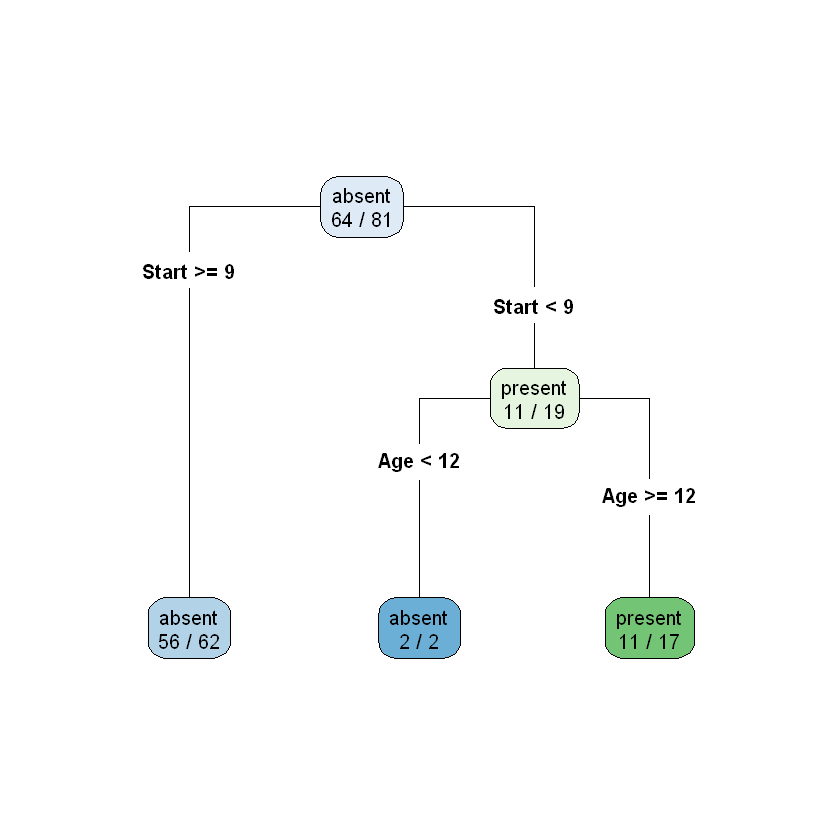

In [14]:
fit <- rpart(Kyphosis ~ Age + Number + Start, data = kyphosis,control=rpart.control(minsplit=1,maxdepth=2))
rpart.plot(fit, type=4, extra=2, clip.right.labs=FALSE, varlen=0, faclen=3)

In [16]:
library(rattle)
asRules(fit)


 Rule number: 7 [Kyphosis=present cover=17 (21%) prob=0.65]
   Start< 8.5
   Age>=11.5

 Rule number: 2 [Kyphosis=absent cover=62 (77%) prob=0.10]
   Start>=8.5

 Rule number: 6 [Kyphosis=absent cover=2 (2%) prob=0.00]
   Start< 8.5
   Age< 11.5



In [7]:
library(RWeka)
# ?Weka_classifiers
#https://blog.csdn.net/jacksonislwj/article/details/6364607

In [31]:
PART(Kyphosis ~ Age + Number + Start, data = kyphosis)

PART decision list
------------------

Start > 12: absent (46.0/2.0)

Age > 31: present (25.0/11.0)

: absent (10.0/1.0)

Number of Rules  : 	3


![](https://s1.ax1x.com/2018/10/16/iawPXQ.png)